170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

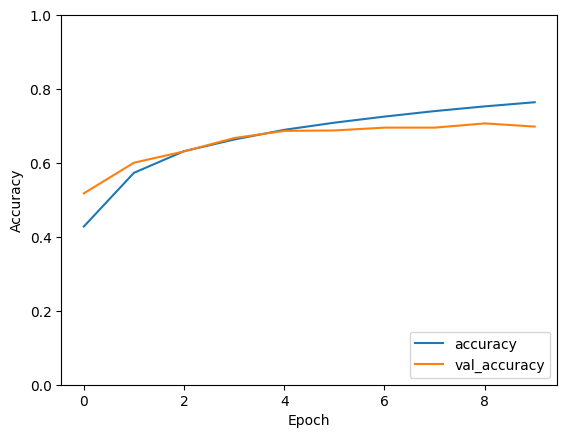

313/313 - 4s - loss: 0.9084 - accuracy: 0.6984 - 4s/epoch - 14ms/step

Test accuracy: 0.6984000205993652


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 1s 602ms/step


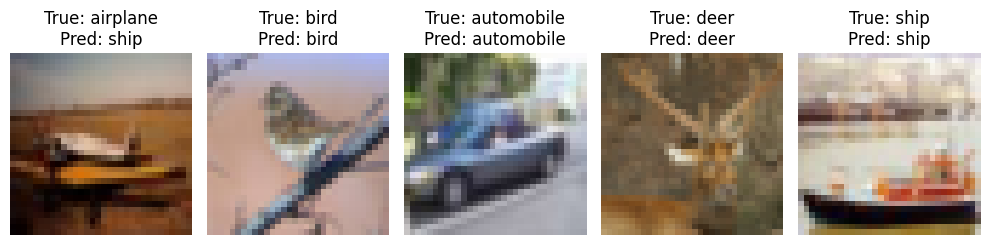

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

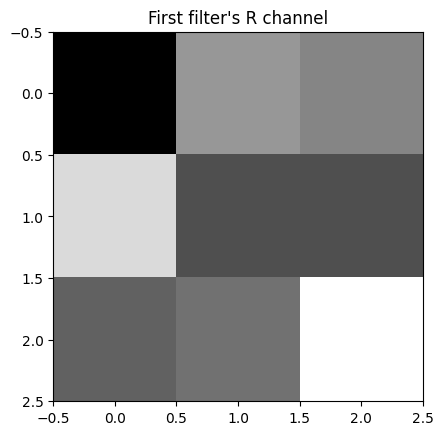

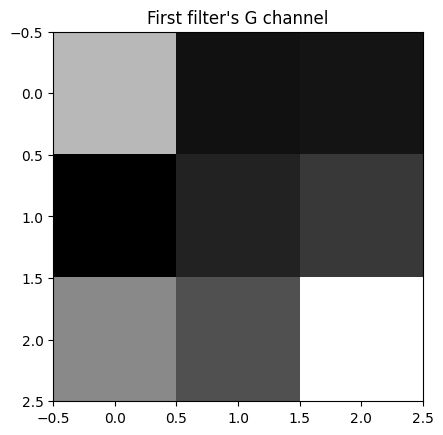

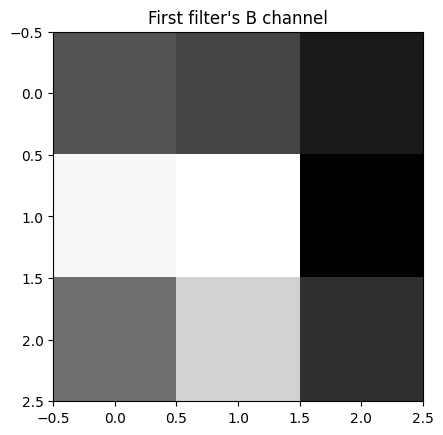

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()